Dataset complete info: https://archive.ics.uci.edu/ml/datasets/zoo

## Attribute information

1. animal name: Unique for each instance 
2. hair: Boolean 
3. feathers: Boolean 
4. eggs: Boolean 
5. milk: Boolean 
6. airborne: Boolean 
7. aquatic: Boolean 
8. predator: Boolean 
9. toothed: Boolean 
10. backbone: Boolean 
11. breathes: Boolean 
12. venomous: Boolean 
13. fins: Boolean 
14. legs: Numeric (set of values: {0,2,4,5,6,8}) 
15. tail: Boolean 
16. domestic: Boolean 
17. catsize: Boolean 
18. type: Numeric (integer values in range [1,7])


The last feature, "type", contains: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate. This will be our target.





In [22]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [26]:
import pandas as pd
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [38]:
columns =["buying",
"maint",
"doors",
"persons",
"lug_boot",
"safety",
"acceptability"]

In [54]:
df = pd.read_csv(car_data, names=columns)
df = df.replace({'5more': 5, 'more': 5})
df = df.replace({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
df = df.replace({'big': 3, 'small': 1})
df = df.replace({'acc': 1, 'unacc': 0, 'good': 2, 'vgood': 3})
df

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,2
1724,1,1,5,5,2,3,3
1725,1,1,5,5,3,1,0
1726,1,1,5,5,3,2,2


In [43]:
df = df.astype({'buying': str, 'maint': str, 'doors': int, 'persons': int, 'lug_boot': str, 'safety': str, 'acceptability': str})
df.dtypes

buying           object
maint            object
doors             int32
persons           int32
lug_boot         object
safety           object
acceptability    object
dtype: object

In [62]:
df["acceptability"].unique()

array([0, 1, 3, 2], dtype=int64)

In [61]:
len(df["acceptability"].unique())

4

In [63]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [75]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: acceptability, Length: 1728, dtype: int64

TypeError: 'value' must be an instance of str or bytes, not a int

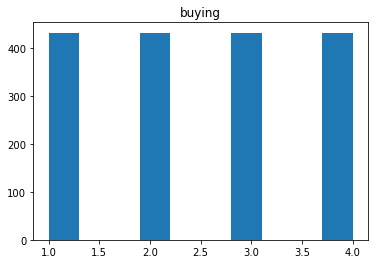

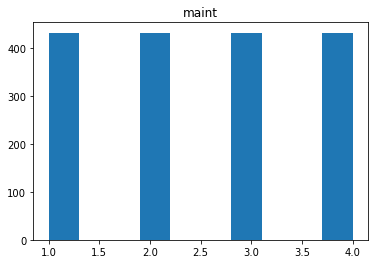

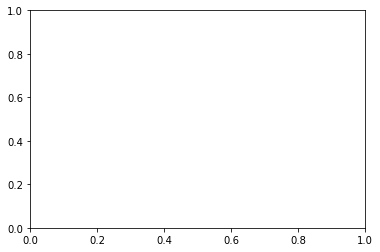

In [65]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [47]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [67]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(0.5960365853658537, 0.9615384615384616, 'safety <= 1.5\ngini = 0.452\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(0.5838414634146342, 0.8846153846153846, 'gini = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(0.6082317073170732, 0.8846153846153846, 'persons <= 3.0\ngini = 0.576\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(0.5960365853658537, 0.8076923076923077, 'gini = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(0.6204268292682927, 0.8076923076923077, 'buying <= 2.5\ngini = 0.628\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(0.3201219512195122, 0.7307692307692307, 'maint <= 1.5\ngini = 0.646\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = acc'),
 Text(0.11280487804878049, 0.6538461538461539, 'safety <= 2.5\ngini = 0.612\nsamples = 65\nvalue = [3, 9, 35, 18]\nclass = good'),
 Text(0.06097560975609756, 0.5769230769230769, 'lug_boot <= 1.5\ngini = 0.456\nsamples = 31\nvalue 

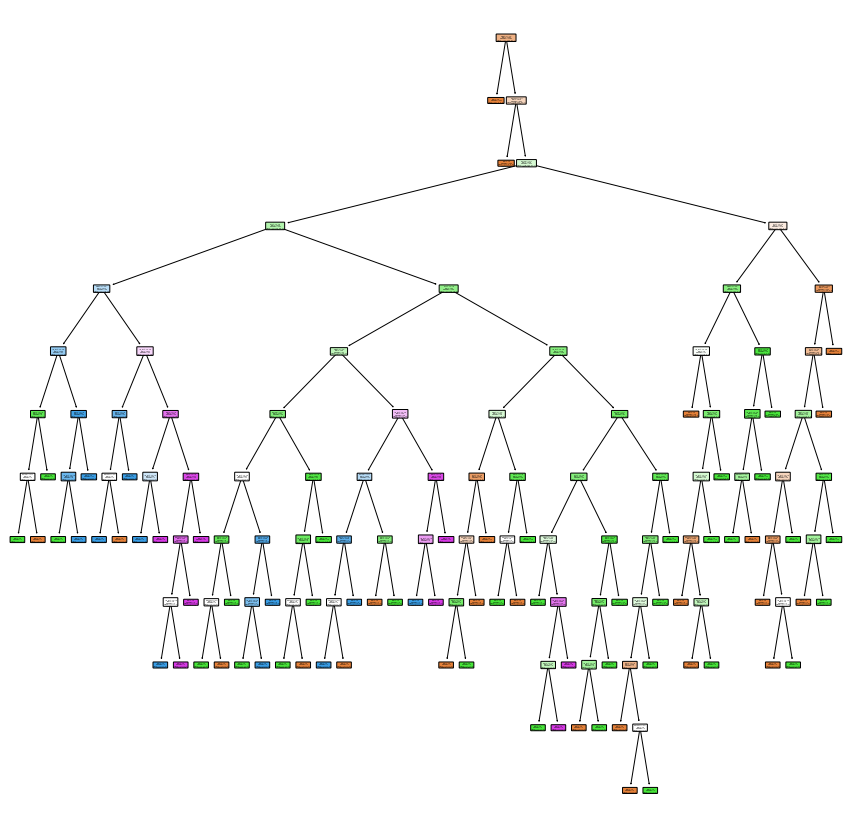

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
         feature_names=X.columns)

C:\Users\lusty\anaconda3\envs\strive2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


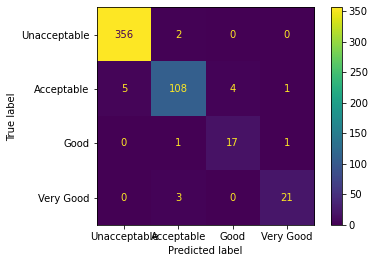

In [73]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['Unacceptable', 'Acceptable', 'Good', 'Very Good'])